In [1]:
import numpy as np
import pandas as pd
import pickle
import os
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm, PowerNorm

In [2]:
def read_dataframe(PATH, N):
    df = pd.DataFrame()
    input_id = 0
    gra = 7
    N_PCs = 15

    for i in range(N):
        results_dict = pickle.load(open(PATH %(i),'rb'))
        if type(results_dict) != str:
            n_classifiers = len(results_dict.keys())
            for clf in results_dict.keys():
                aux_dict = results_dict[clf]
                aux_dict['N_PCs'] = N_PCs
                aux_dict['Granularity'] = gra
                aux_dict['Classifier'] = clf
                aux_dict['Iteration'] = i
                aux_dict['Time'] = results_dict[clf]['time']
                df = df.append(aux_dict, ignore_index=True)
                        
    return df

In [17]:
input_id = 0

for st in ['union', 'intersection']:
    PATH = f"Classification"
    FILE = "/Classifiers_result__{}__%i__{}__.pkl".format(input_id, st)
    RESULTS_FILE = f'results_{st}.csv'
            
    df = read_dataframe(PATH + FILE, 5)
                
    results_df = df.groupby(['Classifier','Granularity', 'N_PCs']).agg({'Accuracy':['mean','std'],
                                                                    'features':['mean','std'],
                                                                    'variation':['mean','std']})
    
    df['Time[s]'] = df['Time'].dt.total_seconds()    
    time_df = df.groupby(['Classifier','Granularity', 'N_PCs']).agg({'Time[s]':['mean','std']})
    
    results_df = pd.concat([results_df, time_df], axis=1)
                
    results_df.to_csv('Results/' + RESULTS_FILE)

KeyError: 'time'

# MATRIZ DE CONFUSÃO

In [13]:
best_classifier = "Neural Net"

confusion_matrix = df[(df['Classifier'] == best_classifier)]['matrix'].sum()

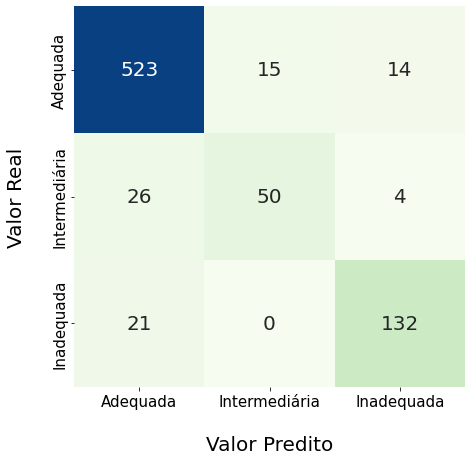

In [14]:
plt.figure(figsize=(7,7))

g = sns.heatmap(confusion_matrix, 
            cmap='GnBu', 
            fmt='d', 
            annot=True, 
            cbar=False, 
            annot_kws={'fontsize':20},
            xticklabels=['Adequada', 'Intermediária', 'Inadequada'],
            yticklabels=['Adequada', 'Intermediária', 'Inadequada'])
g.set_yticklabels(labels=g.get_yticklabels(), va='center', fontsize=15)
g.set_xticklabels(labels=g.get_xticklabels(), fontsize=15)


plt.ylabel('Valor Real\n', fontsize=20)
plt.xlabel('\nValor Predito', fontsize=20)
plt.savefig('Figures/confusion_matrix.png', bbox_inches='tight')
plt.show()